## Exploratory Data Analysis


In [38]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [44]:
col_names = ["image_name", "x1", "y1", "x2", "y2", "class", "image_width", "image_height"]

#Paths

images_path = '../data/tmp/images/'
annotations_path = '../data/tmp/annotations/'
labels_path = '../data/tmp/labels/'

#CSV to DataFrame

img_train = pd.read_csv(annotations_path+'annotations_train.csv', names=col_names)


## Show 5 images with their bounding boxes

### Bounding boxes are in Yolov5 format. Bounding boxes are taken from txt files. Bounding boxes from class 0 were taken from the original dataset. Class 1 bounding box were obtain from label-studio. This notebook intend to check that bounding boxes are correct for class 1. 

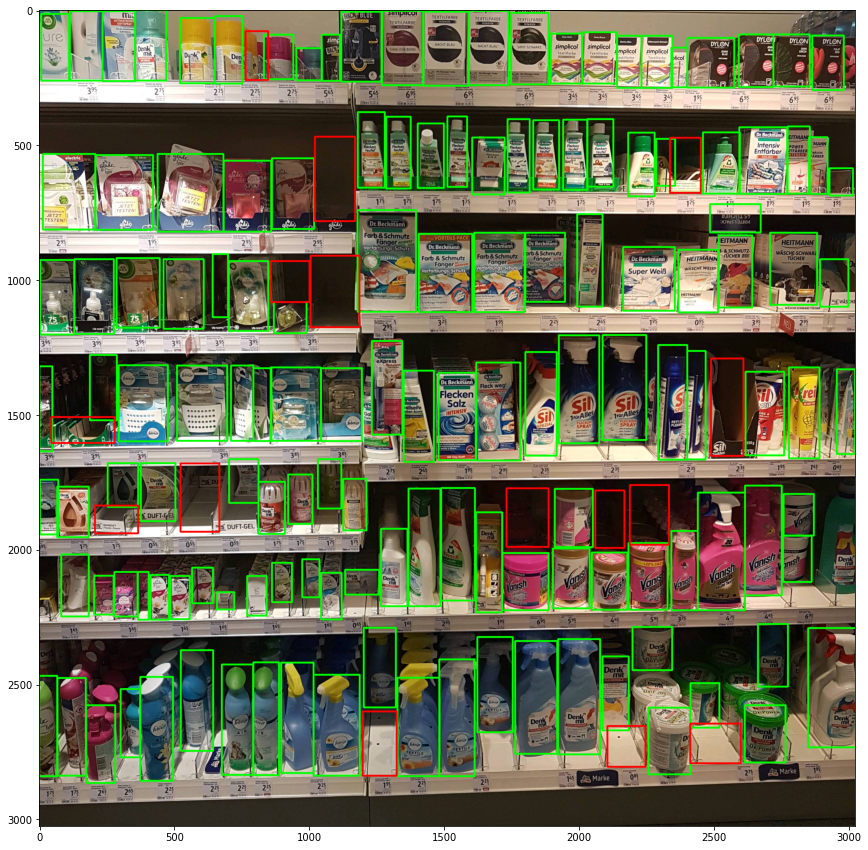

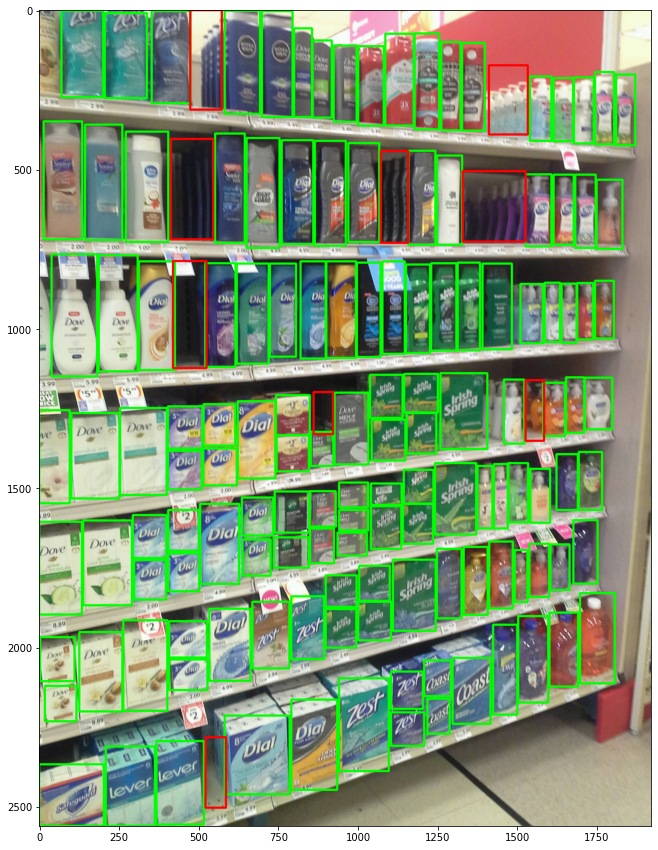

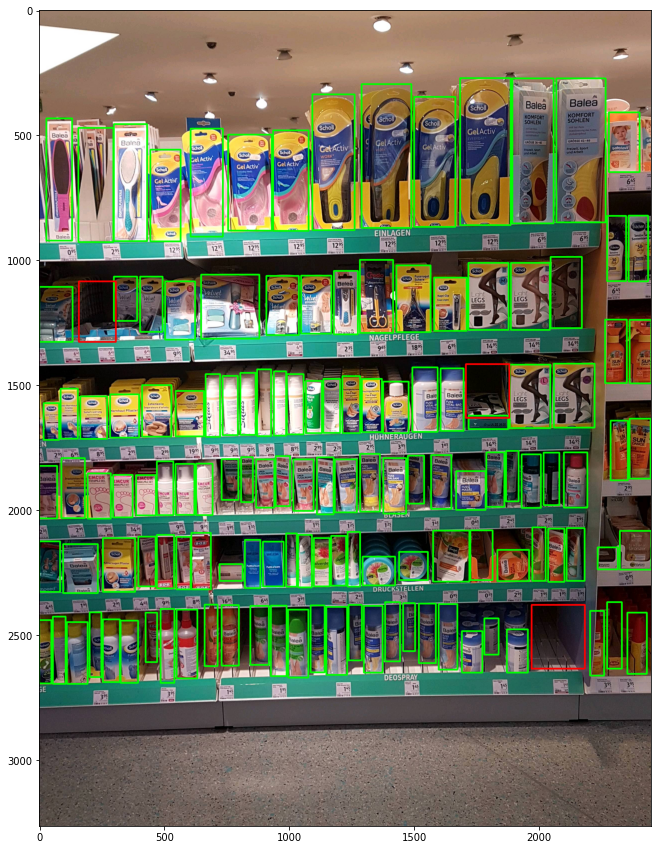

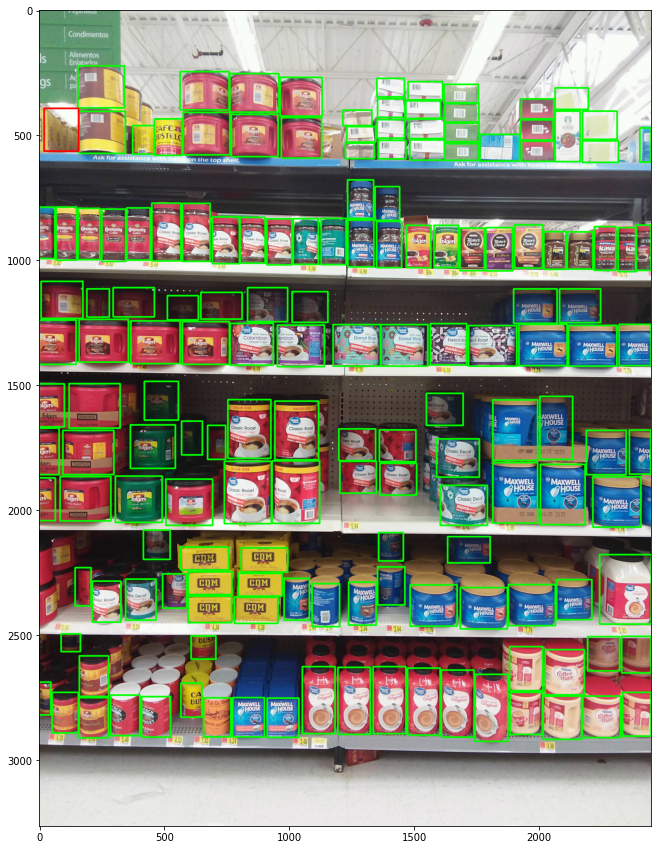

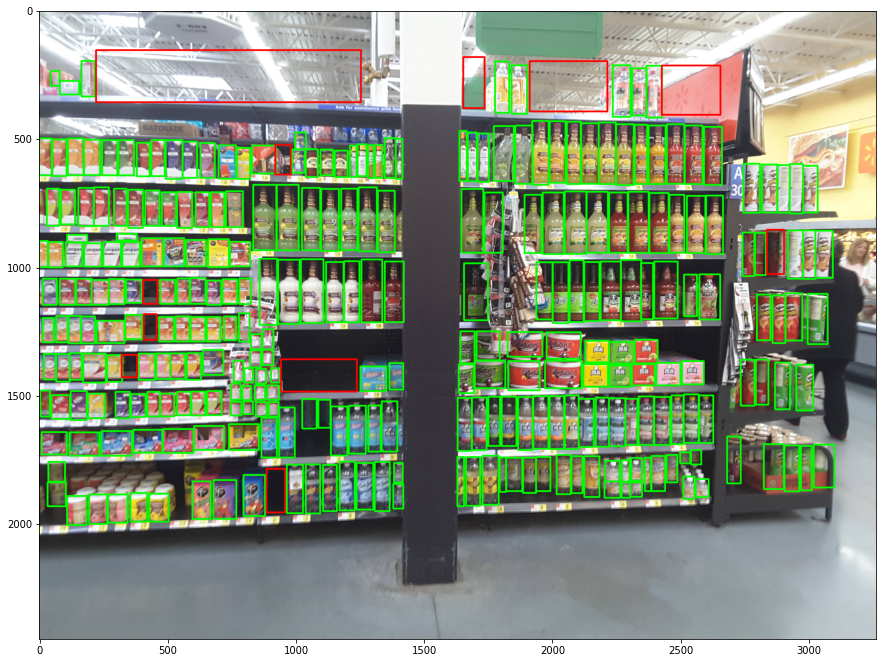

In [52]:
img_list = ['train_0', 'train_1', 'train_2', 'train_3', 'train_4']

for img_name in img_list:
    mask = img_train['image_name'] == img_name+'.jpg'
    img = cv2.imread(os.path.join(images_path, img_name+'.jpg'))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_width = img_train[mask].iloc[0].image_width
    image_height = img_train[mask].iloc[0].image_height
    list_bb=[]
    with open(labels_path+img_name+'.txt', "r") as f:
            for line in f:
                line_cont = (line.strip().split())
                class_bb  = int(line_cont[0])
                x_desnorm = float(line_cont[1]) * image_width
                y_desnorm = float(line_cont[2]) * image_height
                w_desnorm = float(line_cont[3]) * image_width
                h_desnorm = float(line_cont[4]) * image_height
                x1 = x_desnorm - w_desnorm / 2
                y1 = y_desnorm - h_desnorm / 2
                x2 = x_desnorm + w_desnorm / 2
                y2 = y_desnorm + h_desnorm / 2
                dict_bb = {'class':class_bb, 'x_1':x1, 'y_1':y1, 'x_2':x2, 'y_2':y2}
                list_bb.append(dict_bb)

    # Bounding boxes color
    color = [(0, 255, 0), (255, 0, 0)]
    # Line thickness
    thickness = 5

    for bb in list_bb:
        # Start coordinate, represents the top left corner of rectangle
        start_point = (int(bb['x_1']), int(bb['y_1']))

        # Ending coordinate,represents the bottom right corner of rectangle
        end_point = (int(bb['x_2']), int(bb['y_2']))

        #Draw a rectangle of black color of thickness -1 px
        img_rgb = cv2.rectangle(img_rgb, start_point, end_point, color[bb['class']], thickness)

    # Display
    fig = plt.figure(figsize = (15,15))
    plt.imshow(img_rgb)
    plt.show()            